In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from IPython.display import Markdown

sns.set(style="whitegrid")

rng = np.random.default_rng(seed=42)

mu_norm, sigma_norm = 12, 4

lmb = 0.3

mu_logn, sigma_logn = 1.5, 0.8

sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
num_samples = 50

theoretical_params = {
    "normal": (mu_norm, sigma_norm**2),
    "exponential": (1 / lmb, 1 / lmb**2),
    "lognormal": (
        np.exp(mu_logn + sigma_logn**2 / 2),
        (np.exp(sigma_logn**2) - 1) * np.exp(2 * mu_logn + sigma_logn**2),
    ),
}

names = {
    "normal": "Нормальное",
    "exponential": "Экспоненциальное",
    "lognormal": "Логнормальное",
}

In [2]:
normal = stats.norm(mu_norm, sigma_norm)
exponential = stats.expon(scale=1 / lmb)
lognormal = stats.lognorm(s=sigma_logn, scale=np.exp(mu_logn))

results = []

for size in sample_sizes:

    for _ in range(num_samples):
        normal_dist = normal.rvs(size, random_state=rng)
        exponential_dist = exponential.rvs(size, random_state=rng)
        lognormal_dist = lognormal.rvs(size, random_state=rng)

        samples = {
            "normal": normal_dist,
            "exponential": exponential_dist,
            "lognormal": lognormal_dist,
        }

        for name, sample in samples.items():
            mean = sample.mean()
            var = sample.var(ddof=1)

            theor_mean, theor_var = theoretical_params[name]

            err_mean = abs(mean - theor_mean) / theor_mean * 100
            err_var = abs(var - theor_var) / theor_var * 100

            results.append([name, size, mean, var, err_mean, err_var])

In [3]:
df_results = pd.DataFrame(
    results,
    columns=[
        "Распределение",
        "Объем выборки",
        "Среднее",
        "Дисперсия",
        "Ошибка среднего (%)",
        "Ошибка дисперсии (%)",
    ],
)

df_results

,Распределение,Объем выборки,Среднее,Дисперсия,Ошибка среднего (%),Ошибка дисперсии (%)
0,normal,10,10.657715,13.942588,11.185710,12.858823
1,exponential,10,2.127994,3.572202,36.160179,67.850180
2,lognormal,10,5.433161,7.532333,11.968803,77.942486
3,normal,10,12.410471,16.083624,3.420588,0.522653
4,exponential,10,2.752948,3.285423,17.411560,70.431193
...,...,...,...,...,...,...
1045,exponential,10000,3.350684,11.259188,0.520514,1.332691
1046,lognormal,10000,6.192253,33.185394,0.330443,2.820641
1047,normal,10000,11.977897,15.850890,0.184191,0.931940
1048,exponential,10000,3.372905,11.766122,1.187142,5.895099


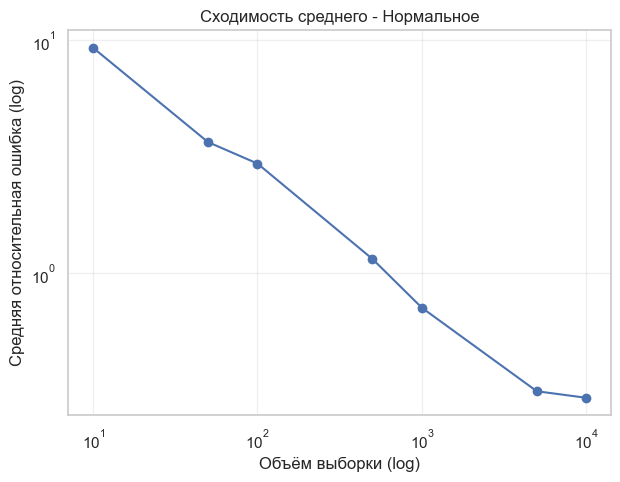

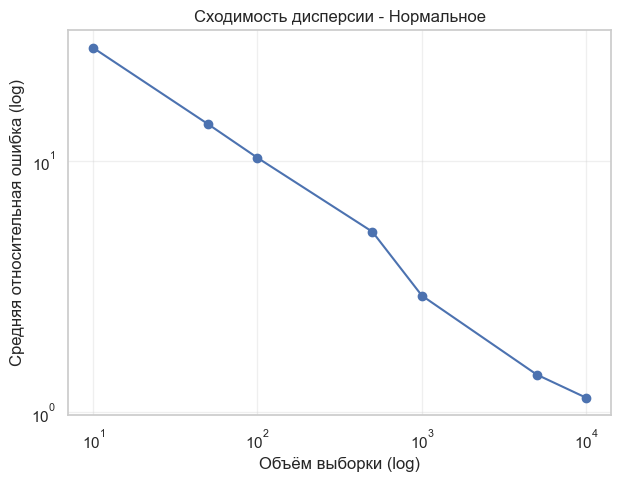

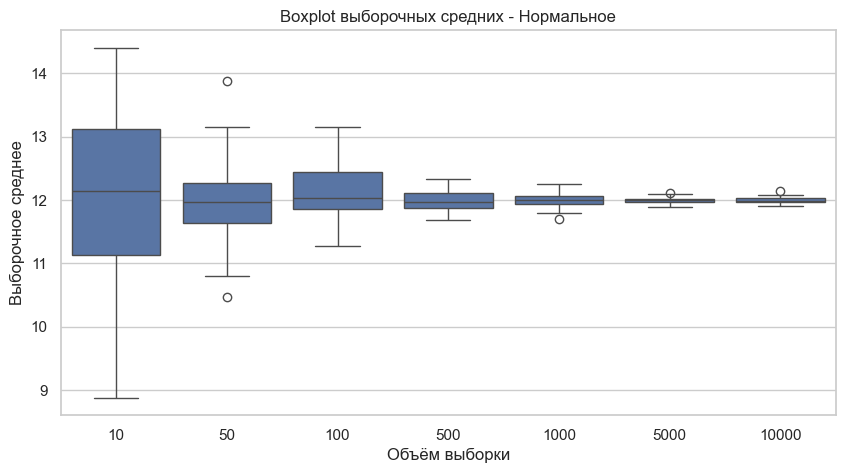

---

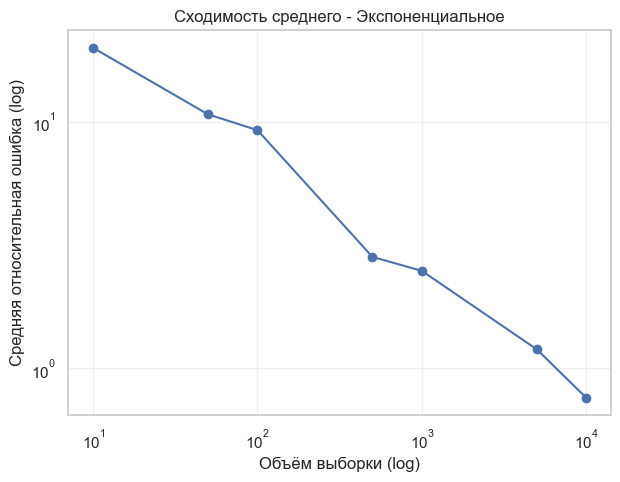

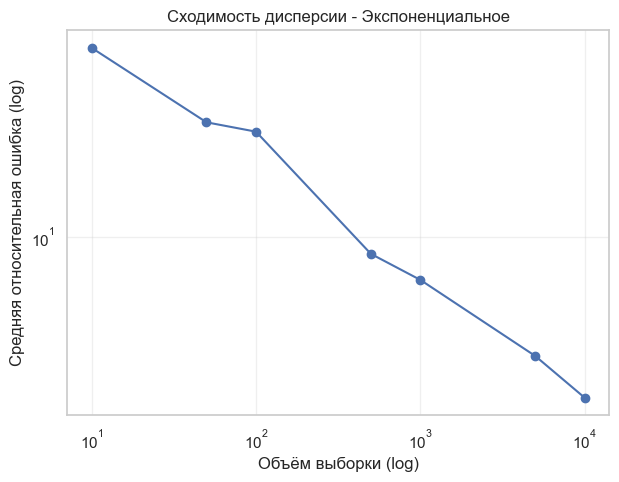

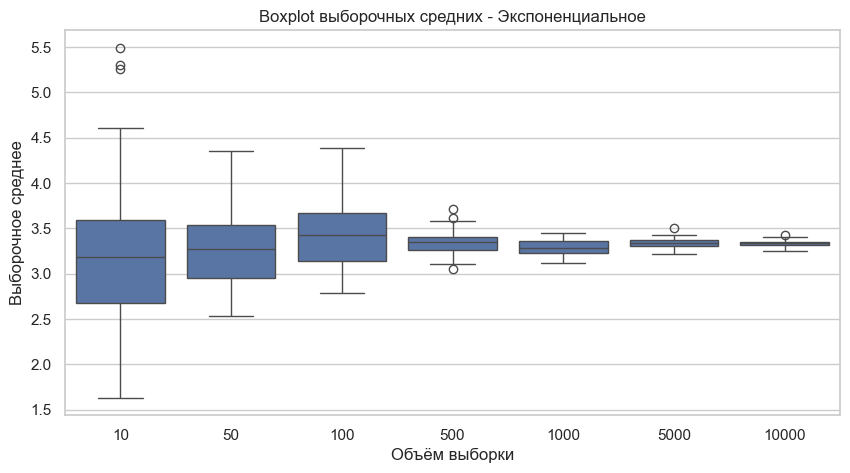

---

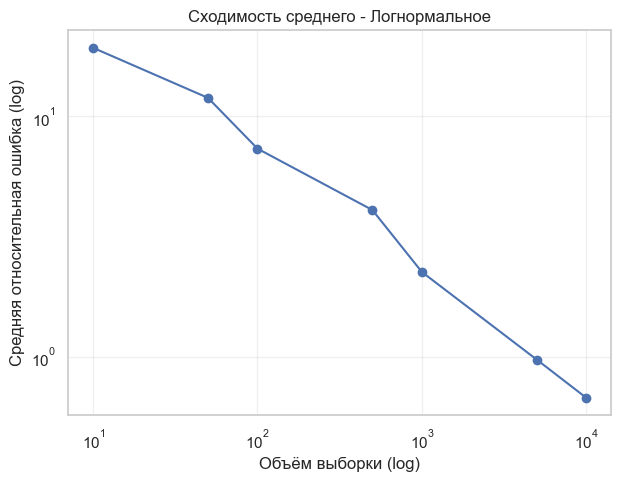

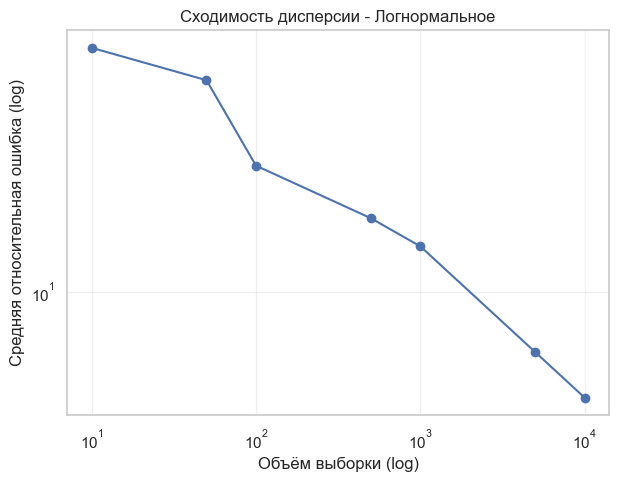

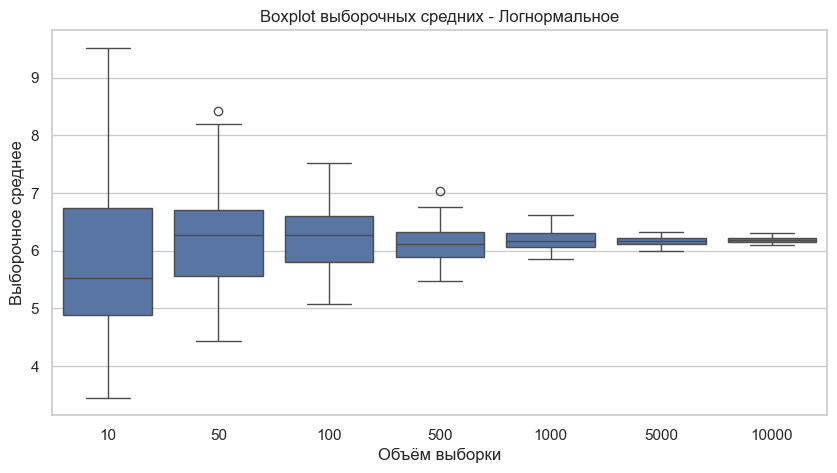

In [4]:
dists = df_results["Распределение"].unique()
count = len(dists)

for i, dist in enumerate(dists):
    sub = df_results[df_results["Распределение"] == dist]

    mean_err = sub.groupby("Объем выборки")["Ошибка среднего (%)"].mean()
    var_err = sub.groupby("Объем выборки")["Ошибка дисперсии (%)"].mean()

    plt.figure(figsize=(7, 5))
    plt.plot(mean_err.index, mean_err.values, marker="o")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"Сходимость среднего - {names[dist]}")
    plt.xlabel("Объём выборки (log)")
    plt.ylabel("Средняя относительная ошибка (log)")
    plt.grid(alpha=0.3)
    plt.show()

    plt.figure(figsize=(7, 5))
    plt.plot(var_err.index, var_err.values, marker="o")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"Сходимость дисперсии - {names[dist]}")
    plt.xlabel("Объём выборки (log)")
    plt.ylabel("Средняя относительная ошибка (log)")
    plt.grid(alpha=0.3)
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x="Объем выборки", y="Среднее", data=sub)
    plt.title(f"Boxplot выборочных средних - {names[dist]}")
    plt.xlabel("Объём выборки")
    plt.ylabel("Выборочное среднее")
    plt.show()

    if i < count - 1:
        display(Markdown("---"))

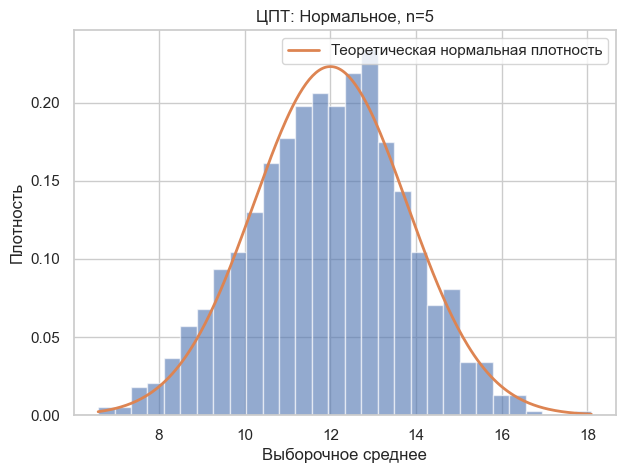

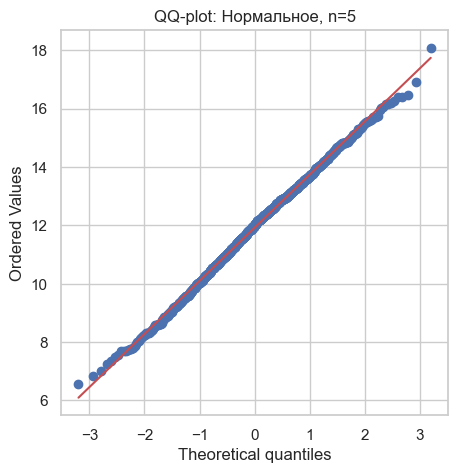

Нормальное, n=5, p-value Шапиро–Уилка = 0.3090


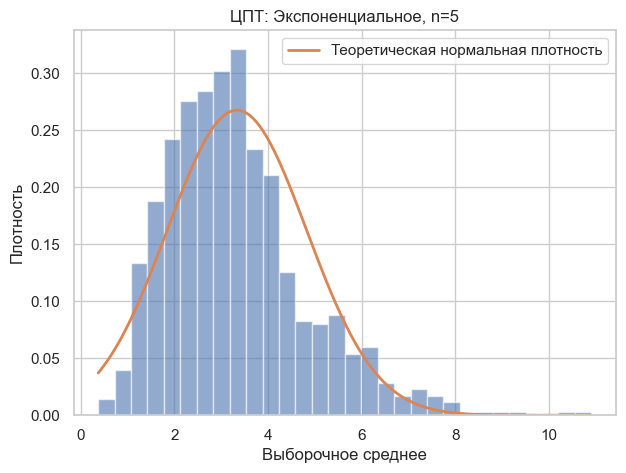

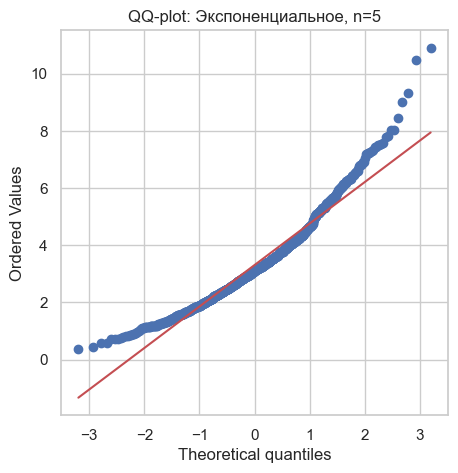

Экспоненциальное, n=5, p-value Шапиро–Уилка = 0.0000


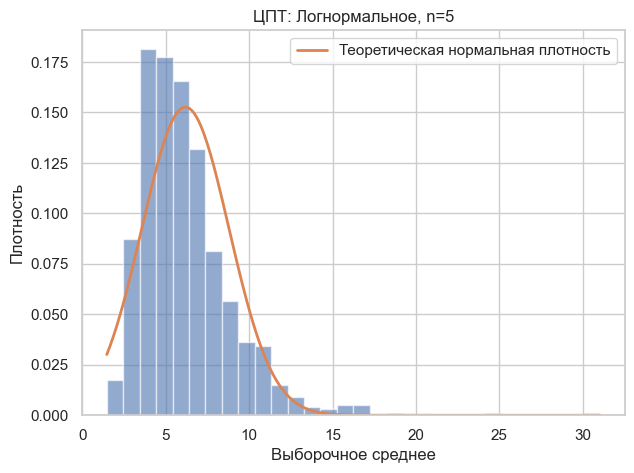

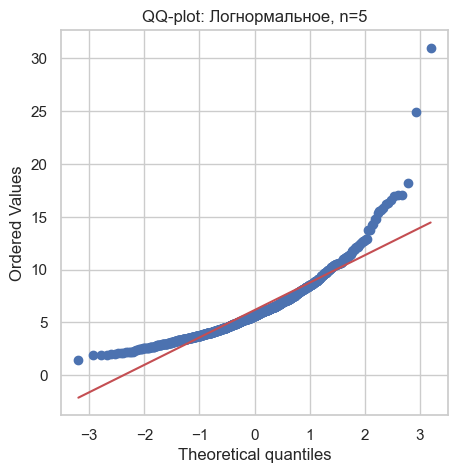

Логнормальное, n=5, p-value Шапиро–Уилка = 0.0000


---

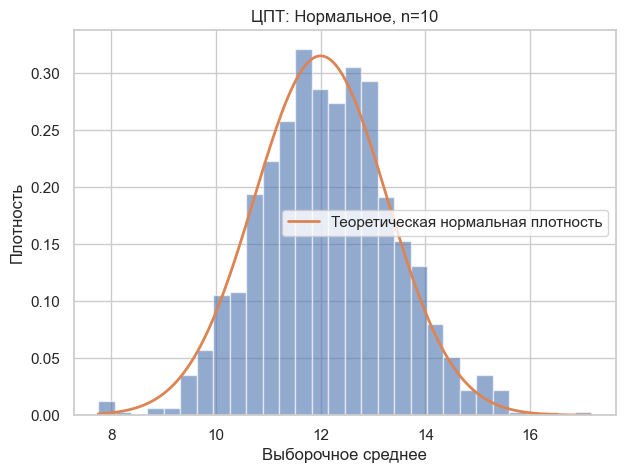

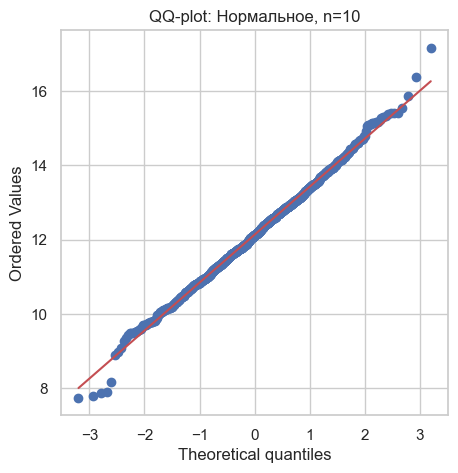

Нормальное, n=10, p-value Шапиро–Уилка = 0.1006


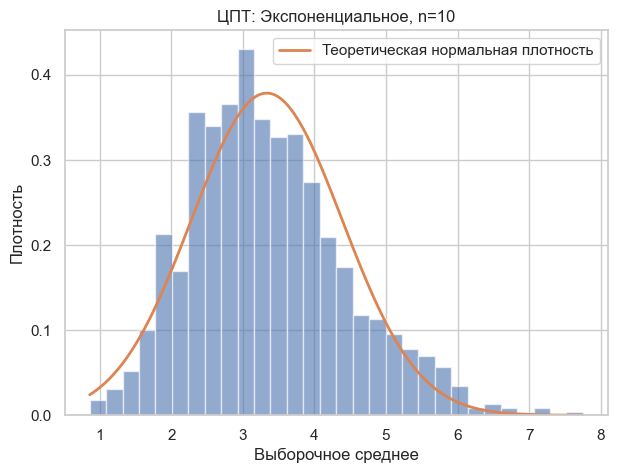

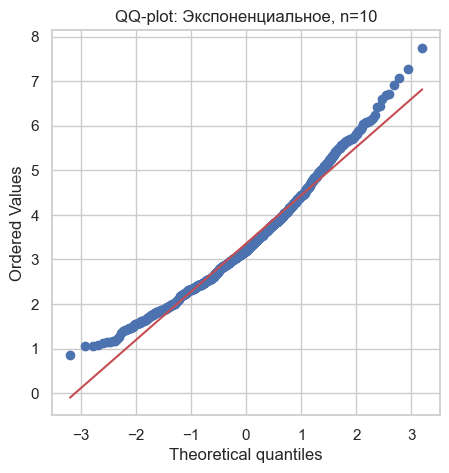

Экспоненциальное, n=10, p-value Шапиро–Уилка = 0.0000


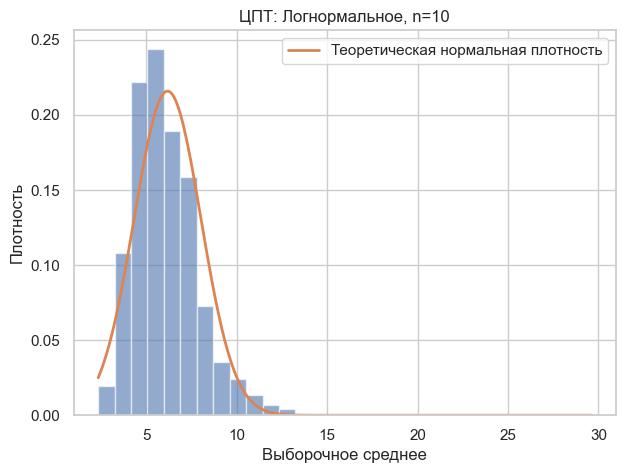

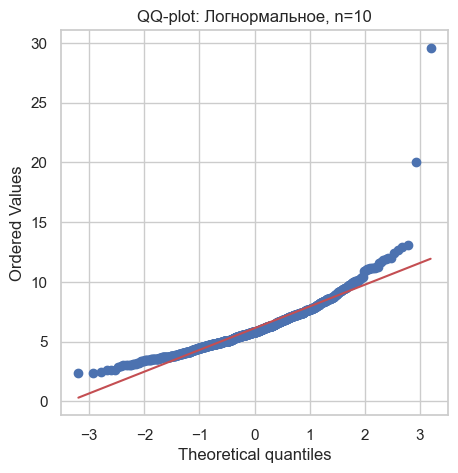

Логнормальное, n=10, p-value Шапиро–Уилка = 0.0000


---

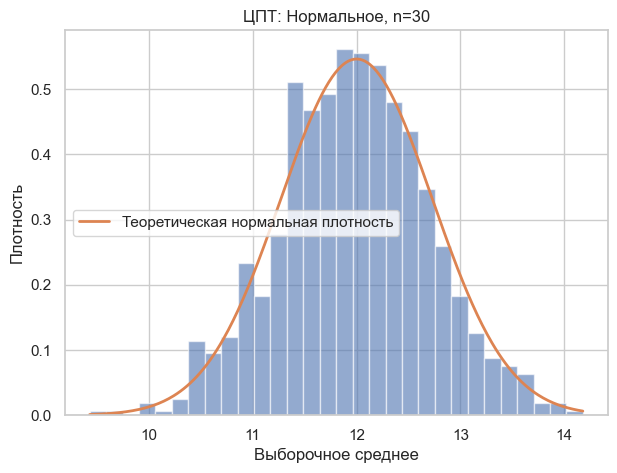

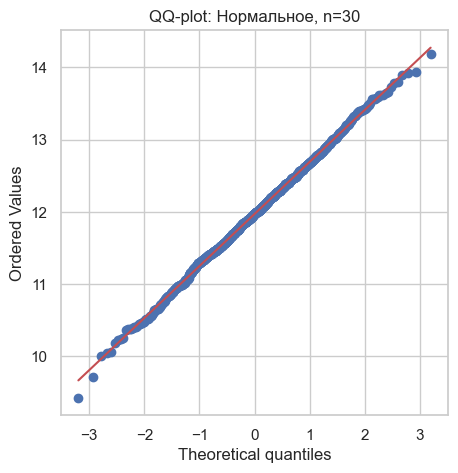

Нормальное, n=30, p-value Шапиро–Уилка = 0.9318


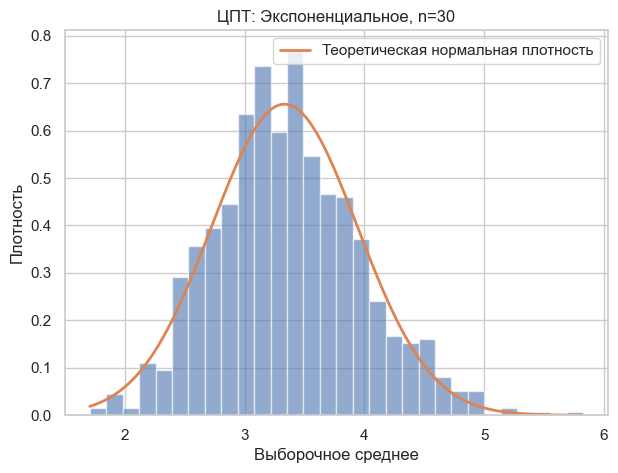

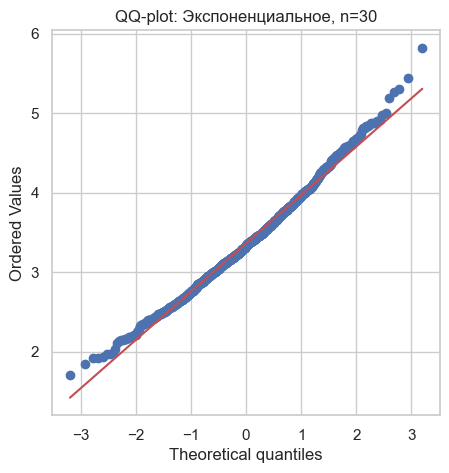

Экспоненциальное, n=30, p-value Шапиро–Уилка = 0.0001


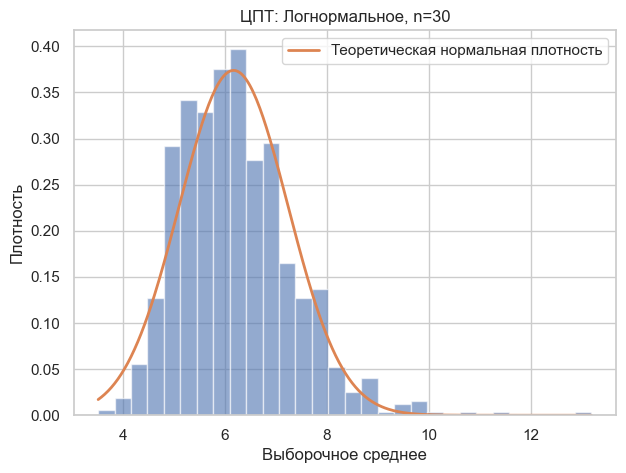

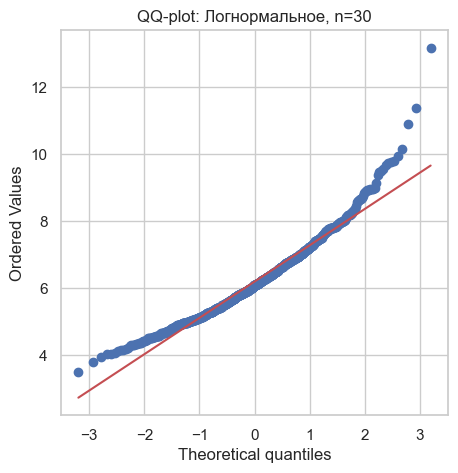

Логнормальное, n=30, p-value Шапиро–Уилка = 0.0000


---

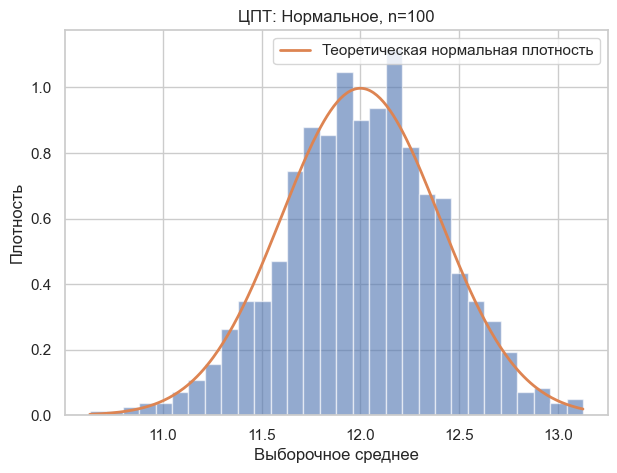

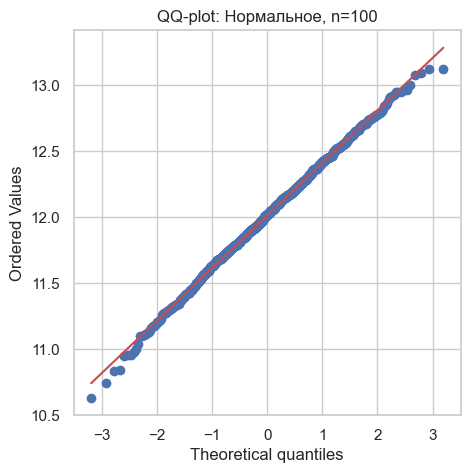

Нормальное, n=100, p-value Шапиро–Уилка = 0.6940


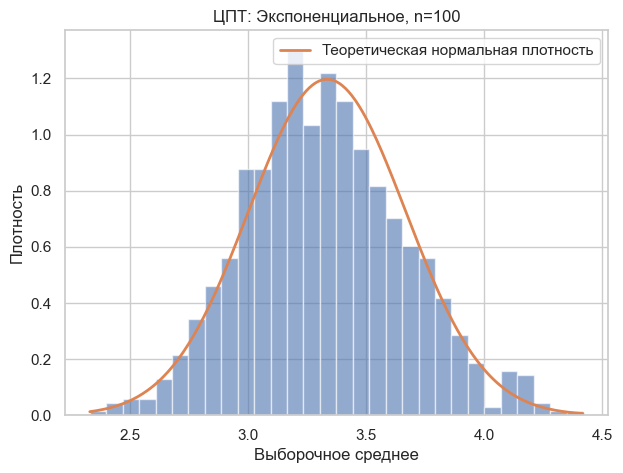

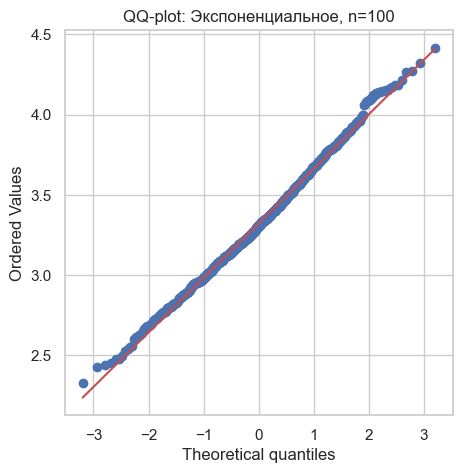

Экспоненциальное, n=100, p-value Шапиро–Уилка = 0.0174


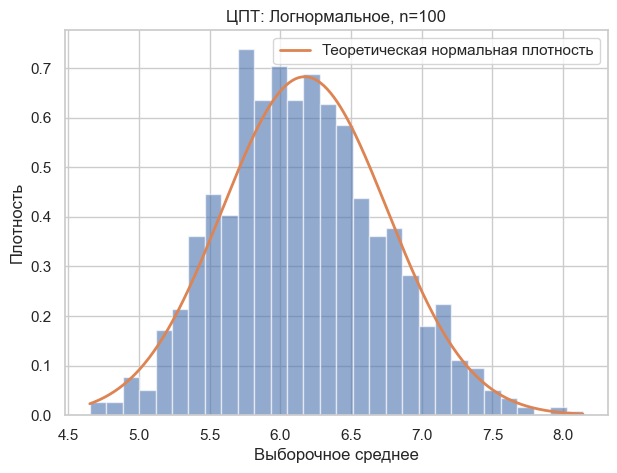

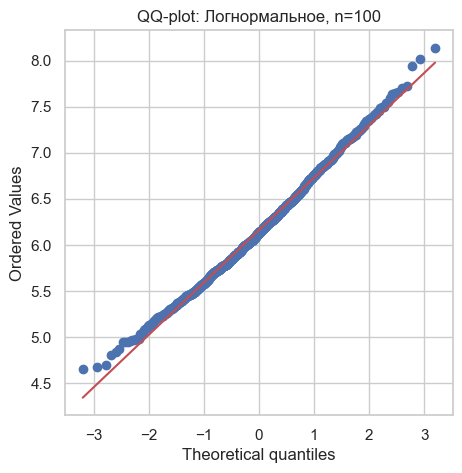

Логнормальное, n=100, p-value Шапиро–Уилка = 0.0018


In [5]:
rng = np.random.default_rng(seed=42)

clt_sizes = [5, 10, 30, 100]

distributions = {
    "normal": normal,
    "exponential": exponential,
    "lognormal": lognormal,
}

count = len(clt_sizes)

for i, size in enumerate(clt_sizes):
    for name, dist in distributions.items():
        means = []

        for _ in range(1000):
            sample = dist.rvs(size, random_state=rng)
            means.append(sample.mean())

        means = np.array(means)

        theor_mean, theor_var = theoretical_params[name]

        plt.figure(figsize=(7, 5))
        plt.hist(means, bins=30, density=True, alpha=0.6)

        x = np.linspace(means.min(), means.max(), 300)
        plt.plot(
            x,
            stats.norm.pdf(x, theor_mean, np.sqrt(theor_var / size)),
            label="Теоретическая нормальная плотность",
            linewidth=2,
        )

        plt.title(f"ЦПТ: {names[name]}, n={size}")
        plt.xlabel("Выборочное среднее")
        plt.ylabel("Плотность")
        plt.legend()
        plt.show()

        plt.figure(figsize=(5, 5))
        stats.probplot(means, dist="norm", plot=plt)
        plt.title(f"QQ-plot: {names[name]}, n={size}")
        plt.show()

        _, p = stats.shapiro(means)
        print(f"{names[name]}, n={size}, p-value Шапиро–Уилка = {p:.4f}")

    if i < count - 1:
        display(Markdown("---"))

In [6]:
for dist in df_results["Распределение"].unique():
    sub = df_results[df_results["Распределение"] == dist]
    mean_err = sub.groupby("Объем выборки")["Ошибка среднего (%)"].mean()

    log_n = np.log(mean_err.index.values)
    log_err = np.log(mean_err.values)

    slope, intercept = np.polyfit(log_n, log_err, 1)

    print(f"{names[dist]}: показатель степени ≈ {slope:.3f}")

    for threshold in [5, 2]:
        suitable = mean_err[mean_err < threshold]
        if len(suitable) > 0:
            print(f"  Ошибка < {threshold}% при n ≈ {suitable.index[0]}")
        else:
            print(f"  Ошибка < {threshold}% не достигнута")

Нормальное: показатель степени ≈ -0.522
  Ошибка < 5% при n ≈ 50
  Ошибка < 2% при n ≈ 500
Экспоненциальное: показатель степени ≈ -0.482
  Ошибка < 5% при n ≈ 500
  Ошибка < 2% при n ≈ 5000
Логнормальное: показатель степени ≈ -0.500
  Ошибка < 5% при n ≈ 500
  Ошибка < 2% при n ≈ 5000
